In [2]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

(0.0, 2.0)

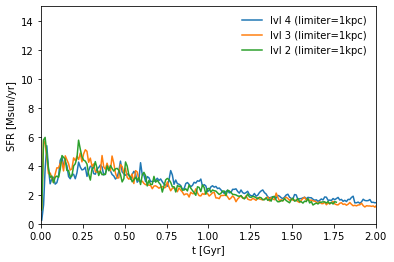

In [4]:
# sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl4/output/sfr.txt')
sfh_filet10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl4-limiter/output/sfr.txt')
# sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl3/output/sfr.txt')
sfh_file_l3t10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl3-limiter/output/sfr.txt')
# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl2/output/sfr.txt')
sfh_file_l2t10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl2-limiter/output/sfr.txt')

# time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
timet10, sfrt10 = bin_sfr(sfh_filet10[:,0], sfh_filet10[:,2])
# time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2])
time_l3t10, sfr_l3t10 = bin_sfr(sfh_file_l3t10[:,0], sfh_file_l3t10[:,2])
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2])
time_l2t10, sfr_l2t10 = bin_sfr(sfh_file_l2t10[:,0], sfh_file_l2t10[:,2])
# plt.plot(time, sfr, label='lvl 4')
plt.plot(timet10, sfrt10, label='lvl 4 (limiter=1kpc)')
# plt.plot(time_l3, sfr_l3, label='lvl 3')
plt.plot(time_l3t10, sfr_l3t10, label='lvl 3 (limiter=1kpc)')
# plt.plot(time_l2, sfr_l2, label='lvl 2')
plt.plot(time_l2t10, sfr_l2t10, label='lvl 2 (limiter=1kpc)')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, 15)
plt.xlim(0, 2)

(0.0, 2.0)

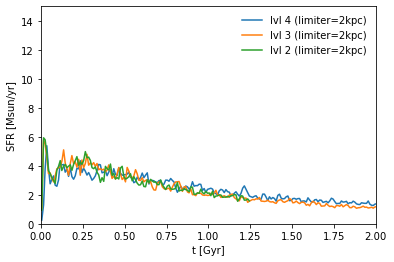

In [5]:
# sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl4/output/sfr.txt')
sfh_filet10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl4-limiter2/output/sfr.txt')
# sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl3/output/sfr.txt')
sfh_file_l3t10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl3-limiter2/output/sfr.txt')
# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl2/output/sfr.txt')
sfh_file_l2t10 = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl2-limiter2/output/sfr.txt')

# time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
timet10, sfrt10 = bin_sfr(sfh_filet10[:,0], sfh_filet10[:,2])
# time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2])
time_l3t10, sfr_l3t10 = bin_sfr(sfh_file_l3t10[:,0], sfh_file_l3t10[:,2])
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2])
time_l2t10, sfr_l2t10 = bin_sfr(sfh_file_l2t10[:,0], sfh_file_l2t10[:,2])
# plt.plot(time, sfr, label='lvl 4')
plt.plot(timet10, sfrt10, label='lvl 4 (limiter=2kpc)')
# plt.plot(time_l3, sfr_l3, label='lvl 3')
plt.plot(time_l3t10, sfr_l3t10, label='lvl 3 (limiter=2kpc)')
# plt.plot(time_l2, sfr_l2, label='lvl 2')
plt.plot(time_l2t10, sfr_l2t10, label='lvl 2 (limiter=2kpc)')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.axvline(0.005*25)
plt.ylim(0, 15)
plt.xlim(0, 2)

### morphology

In [4]:
sn_fid = {}
sn_lim1 = {}
sn_lim2 = {}
for i in [4, 3, 2]:
    
    sn_fid[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl'+str(i)+'/output', 50, combineFiles=True)
    sn_lim1[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl'+str(i)+'-limiter/output', 50, combineFiles=True)
    sn_lim2[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl'+str(i)+'-limiter2/output', 50, combineFiles=True)


Text(0.5, 1.0, 'limiter=2kpc')

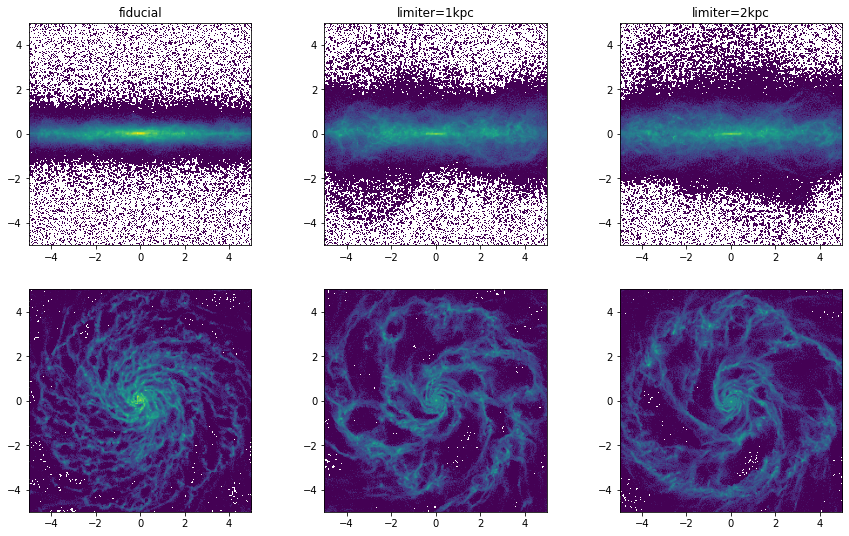

In [67]:
lvl = 2
nres = 256
range_xy = [[-5, 5], [-5, 5]]
vmin=1E-3
vmax=10.**(0.5)
extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

dx = (range_xy[0][1] - range_xy[0][0])/nres
dy = (range_xy[1][1] - range_xy[1][0])/nres
surf = dx * dy

fig, ax = plt.subplots(2, 3, figsize=(15, 9))

sn = sn_fid[lvl]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][0].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# ax[1][0].set_title('fiducial')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][0].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][0].set_title('fiducial')

sn = sn_lim1[lvl]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# ax[1][1].set_title('limiter=1kpc')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][1].set_title('limiter=1kpc')

sn = sn_lim2[lvl]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][2].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# ax[1][2].set_title('limiter=2kpc')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][2].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][2].set_title('limiter=2kpc')

### Phase diagram

In [15]:
def compute_KS(sn, dR=0.5):

    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    pos = sn.part0.pos.value - center
    sfr = sn.part0.sfr
    mass = sn.part0.mass.value * sn.part0.MolecularHFrac
    
#     R = np.linalg.norm(pos[:,:2], axis=1)
    
#     Rmax = 6
    
#     Sigma_gas = []
#     Sigma_sfr = []
    
#     Rmin = 0
#     while Rmin < Rmax:
#         key = np.logical_and(R > Rmin, R < Rmin + dR)
        
#         Sigma_gas_ = np.sum(1E10*mass[key])
#         Sigma_gas_ /= 1000**2
#         Sigma_gas_ /= np.pi*((Rmin+dR)**2 - Rmin**2)
#         Sigma_gas.append(Sigma_gas_)
        
#         Sigma_sfr_ = np.sum(sfr[key])
#         Sigma_sfr_ /= np.pi*((Rmin+dR)**2 - Rmin**2)
#         Sigma_sfr.append(Sigma_sfr_)
        
#         Rmin += dR

    Sigma_gas, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], 1E10*mass, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_gas /= (1000*dR)**2

    Sigma_sfr, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], sfr, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_sfr /= dR**2

    Sigma_gas = Sigma_gas.flatten()
    Sigma_sfr = Sigma_sfr.flatten()
    
    return Sigma_gas, Sigma_sfr
    

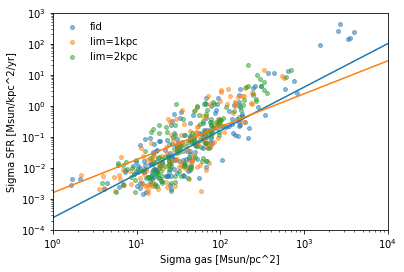

In [21]:
lvl = 2
Sigma_gas_fid, Sigma_sfr_fid = compute_KS(sn_fid[lvl], dR=0.1)
Sigma_gas_lim1, Sigma_sfr_lim1 = compute_KS(sn_lim1[lvl], dR=0.1)
Sigma_gas_lim2, Sigma_sfr_lim2 = compute_KS(sn_lim2[lvl], dR=0.1)

key = np.random.choice(len(Sigma_gas_fid.flatten()), len(Sigma_gas_fid.flatten())//8, replace=False)

plt.scatter(Sigma_gas_fid.flatten()[key], Sigma_sfr_fid.flatten()[key], label='fid', alpha=0.5, s=16)
plt.scatter(Sigma_gas_lim1.flatten()[key], Sigma_sfr_lim1.flatten()[key], label='lim=1kpc', alpha=0.5, s=16)
plt.scatter(Sigma_gas_lim2.flatten()[key], Sigma_sfr_lim2.flatten()[key], label='lim=2kpc', alpha=0.5, s=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1E4)
plt.ylim(1E-4, 1E3)

xKS = np.linspace(1, 1E4, 10000)
# yKS = 2.5E-4 * xKS**1.4
yKS = 2.5E-4 * xKS**1.4
plt.plot(xKS, yKS)
yKS2 = 16E-4 * xKS**1.06
plt.plot(xKS, yKS2)
plt.xlabel('Sigma gas [Msun/pc^2]')
plt.ylabel('Sigma SFR [Msun/kpc^2/yr]')
plt.legend(frameon=False)


In [40]:
print(np.max(Sigma_gas_fid))
print(np.max(Sigma_gas_lim2))

1290.143765573379
292.60884314508274


### phase diagram

In [41]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [42]:
lvl=2

Tfid = compute_T(sn_fid[lvl])
nfid = compute_n(sn_fid[lvl])
mfid = sn_fid[lvl].part0.mass.value

Tlim1 = compute_T(sn_lim1[lvl])
nlim1 = compute_n(sn_lim1[lvl])
mlim1 = sn_lim1[lvl].part0.mass.value

Tlim2 = compute_T(sn_lim2[lvl])
nlim2 = compute_n(sn_lim2[lvl])
mlim2 = sn_lim2[lvl].part0.mass.value

[Text(0.5, 0, 'log n [cm^-3]'), Text(0, 0.5, 'log T [K]')]

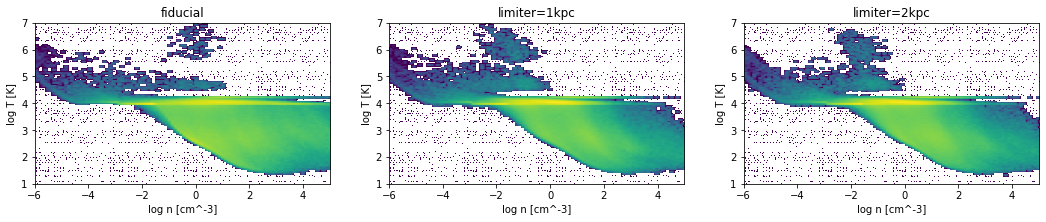

In [52]:
rng = [[-6, 5], [1, 7]]

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nfid), np.log10(Tfid), mfid, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[0].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[0].set(xlim=(-6, 5), ylim=(1, 7), title='fiducial')
ax[0].set(xlabel='log n [cm^-3]', ylabel='log T [K]')

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nlim1), np.log10(Tlim1), mlim1, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[1].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[1].set(xlim=(-6, 5), ylim=(1, 7), title='limiter=1kpc')
ax[1].set(xlabel='log n [cm^-3]', ylabel='log T [K]')

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nlim2), np.log10(Tlim2), mlim2, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[2].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[2].set(xlim=(-6, 5), ylim=(1, 7), title='limiter=2kpc')
ax[2].set(xlabel='log n [cm^-3]', ylabel='log T [K]')


### mass loading

In [6]:
def mass_loading(sn, z0):
    center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
    pos = sn.part0.pos.value - center
    vel = sn.part0.vel.value
    mass = sn.part0.mass.value

    dr = 0.1 * z0

    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    r = np.linalg.norm(pos, axis=1)
    phi = np.arctan2(y, x)
    theta = np.arccos(z/r)

    rhat = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
    vel_r = rhat[0]*vel[:,0] + rhat[1]*vel[:,1] + rhat[2]*vel[:,2]

    key = np.logical_and(np.abs(z) > z0-dr/2, np.abs(z) < z0+dr/2)
    key_out = np.logical_and(key, vel_r > 0)
    key_in = np.logical_and(key, vel_r < 0)

    Mdot_out = np.sum(mass[key_out]*vel_r[key_out])/dr
    Mdot_in = np.sum(mass[key_in]*vel_r[key_in])/dr
    
    return Mdot_out, Mdot_in

In [22]:
lvl = 3

sn = sn_fid[lvl]
sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl'+str(lvl)+'/output/sfr.txt')

time = sn.Time.value
key = np.abs(sfh_file[:,0] - time) < 0.15
mean_SFR = np.mean(sfh_file[:,2][key])

print('fiducal')
for z0 in [1, 3, 5, 10]:
    Mdot_out_, Mdot_in_ = mass_loading(sn, z0)
    print('z0=', z0, 'eta_M fid=', round(Mdot_out_/mean_SFR, 4))
    
sn = sn_lim1[lvl]
sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl'+str(lvl)+'-limiter/output/sfr.txt')

time = sn.Time.value
key = np.abs(sfh_file[:,0] - time) < 0.15
mean_SFR = np.mean(sfh_file[:,2][key])

print('limiter = 1kpc')
for z0 in [1, 3, 5, 10]:
    Mdot_out_, Mdot_in_ = mass_loading(sn, z0)
    print('z0=', z0, 'eta_M fid=', round(Mdot_out_/mean_SFR, 5))

time = sn.Time.value
key = np.abs(sfh_file[:,0] - time) < 0.15
mean_SFR = np.mean(sfh_file[:,2][key])


sn = sn_lim2[lvl]
sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.5/lvl'+str(lvl)+'-limiter2/output/sfr.txt')

time = sn.Time.value
key = np.abs(sfh_file[:,0] - time) < 0.15
mean_SFR = np.mean(sfh_file[:,2][key])

print('limiter = 2kpc')
for z0 in [1, 3, 5, 10]:
    Mdot_out_, Mdot_in_ = mass_loading(sn, z0)
    print('z0=', z0, 'eta_M fid=', round(Mdot_out_/mean_SFR, 5))

sn_fid[i] 
sn_lim1[i]
sn_lim2[i]

fiducal
z0= 1 eta_M fid= 0.0263
z0= 3 eta_M fid= 0.0
z0= 5 eta_M fid= 0.0
z0= 10 eta_M fid= 0.0
limiter = 1kpc
z0= 1 eta_M fid= 0.24046
z0= 3 eta_M fid= 0.00821
z0= 5 eta_M fid= 0.00275
z0= 10 eta_M fid= 0.00095
limiter = 2kpc
z0= 1 eta_M fid= 0.22126
z0= 3 eta_M fid= 0.01344
z0= 5 eta_M fid= 0.00563
z0= 10 eta_M fid= 0.00218


snapshot /n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/MW3iso_fg0.5/lvl2-limiter2/output/snapdir_050/snapshot_050.0.hdf5

### hsml > limiter ratio

In [38]:
snap_list = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
sn_tev1 = {}
sn_tev2 = {}
for snap in tqdm(snap_list):
    sn_tev1[snap] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-limiter/output', snap, combineFiles=True)
    sn_tev2[snap] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-limiter2/output', snap, combineFiles=True)

100%|██████████| 17/17 [02:15<00:00,  7.96s/it]


In [39]:
frac1 = []
frac2 = []
time = []

for snap in snap_list:
    if snap==0.0:
        # print(0.0, 0, 0)
        frac1.append(0.0)
        frac2.append(0.0)
        time.append(0.0)
        continue
    
    Ngrt1 = len(np.where(sn_tev1[snap].part4.StarsHsml > sn_tev1[snap].part4.StarsMaxRadius)[0])
    Ntot1 = sn_tev1[snap].NumPart_Total[4]
    frac1.append(Ngrt1/Ntot1)

    Ngrt2 = len(np.where(sn_tev2[snap].part4.StarsHsml > sn_tev2[snap].part4.StarsMaxRadius)[0])
    Ntot2 = sn_tev2[snap].NumPart_Total[4]
    frac2.append(Ngrt2/Ntot2)
    time.append(sn_tev1[snap].Time.value)
    
    # print(sn_tev1[snap].Time.value, Ngrt1/Ntot1, Ngrt2/Ntot2)
    

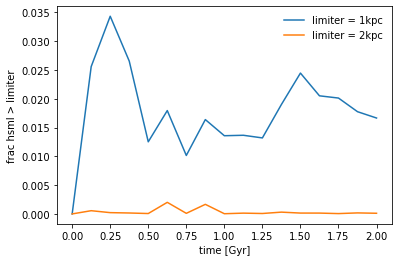

In [43]:
plt.plot(time, frac1, label='limiter = 1kpc')
plt.plot(time, frac2, label='limiter = 2kpc')
plt.ylabel('frac hsml > limiter')
plt.xlabel('time [Gyr]')
plt.legend(frameon=False)

In [30]:
dir(sn_tev1[25].part4)

['Acceleration',
 'BirthDensity',
 'BirthPos',
 'BirthVel',
 'ColumnDensity',
 'Coordinates',
 'CumFeedbackMomentum',
 'CumInjFeedbackMomentum',
 'CumInjFeedbackMomentumAGB',
 'CumSNIINumber',
 'CumSNIaNumber',
 'Cum_RadMomentumRealInjected',
 'Cum_RadiationMomentumReleased',
 'FeedbackEnergy',
 'FeedbackMomentum',
 'FeedbackMomentumAGB',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_StellarFormationTime',
 'LocISMDens',
 'MassReleased',
 'Masses',
 'NormSphRadFeedback',
 'ParticleIDs',
 'Potential',
 'RadCoolShutoffTime',
 'RadFeedTau',
 'RadFeed_NumNgb',
 'RadiationMomentumReleased',
 'SNIINumber',
 'SNIaNumber',
 'Softenings',
 'StarsHsml',
 'StarsMaxRadius',
 'StromgrenRadius',
 'Velocities',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__'